In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

### Cargamos el dataset

In [65]:
df = pd.read_csv('Data/titanic.csv')

In [66]:
df['Pclass'] = df.Pclass.astype(object)

Eliminamos las columnas que no son predicturas

In [67]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Creamos cageogoricas

In [68]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
df['Age'] = df['Age'].fillna(df.Age.mean())


### Crea una regresion logistica

In [70]:
target = 'Survived'
X = df.drop(target, axis=1)
y = df[target]

model= linear_model.LogisticRegression().fit(X, y)
probabilities = model.predict_proba(X)

p1 = [i[1] for i in probabilities]

In [71]:
p1

[0.09310004297223134,
 0.9041091118204134,
 0.6064795355664753,
 0.8628984940147559,
 0.0801694304985385,
 0.13454005375696632,
 0.2510456779844937,
 0.10011852875982906,
 0.5637119178250477,
 0.9072010207982417,
 0.707508730220372,
 0.7722004278854702,
 0.1315322132310217,
 0.03914691936909759,
 0.7056538175322862,
 0.6412064589258577,
 0.10900283567914185,
 0.26147469290562314,
 0.49190841216160086,
 0.6794111893871367,
 0.23283581088515426,
 0.2320532820504758,
 0.7720926183747979,
 0.4533499890168451,
 0.5310860334020124,
 0.3493574660405312,
 0.1430269718790005,
 0.44477224830460727,
 0.6633379308424573,
 0.09575886871602009,
 0.45094560642021553,
 0.9420299003997176,
 0.6632464296757349,
 0.0844400647361197,
 0.5262764520535996,
 0.2762342815594975,
 0.1430286043387906,
 0.12738098147105234,
 0.5334144710265144,
 0.7368113532387953,
 0.4034901527406024,
 0.7883911462447787,
 0.1432878958195333,
 0.9290380643225696,
 0.7450412704914078,
 0.09580121736144445,
 0.1041691545700547,
 

### Concepto odds

Mi equipo gana 1 a 4


In [72]:
1 / 4

0.25

Probabilidad de ganar 

In [73]:
1/(1+4)

0.2

Probabilidad perder

In [74]:
1-1/(1+4)

0.8

Mi equipo gana 5 a 3

In [75]:
5 / 3

1.6666666666666667

Probabilidad que equipo gane 

In [76]:
5 / (5+3)

0.625

Probabilidd de perder

In [77]:
1-(5 / (5+3))

0.375

¿Qué pasa si divido la probabilidad de ganar entre la probabiliad de perder?

In [78]:
p = (5 / (5+3))

p/(1-p)

1.6666666666666667

$$odds = \frac{p}{1-p}$$

Calcula los odds de las predicciones del modelo

In [79]:
odds_titanic =  [i / (1-i) for i in p1]

Los odds pueden llegar a ser muy volatiles, pon el histograma

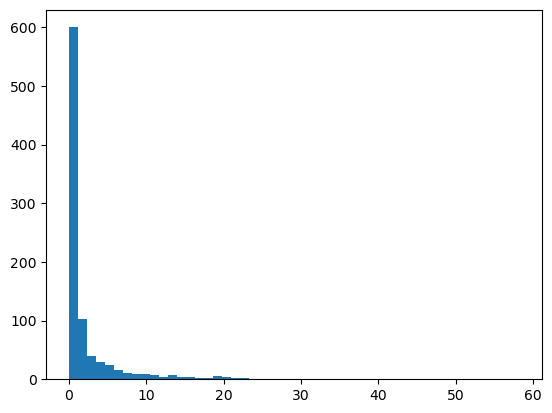

In [80]:
plt.hist(odds_titanic, bins= 50)
plt.show()

$$log(odds) = log(\frac{p}{1-p})$$

Pero el log odds no es tan disperso, histograma del log odds

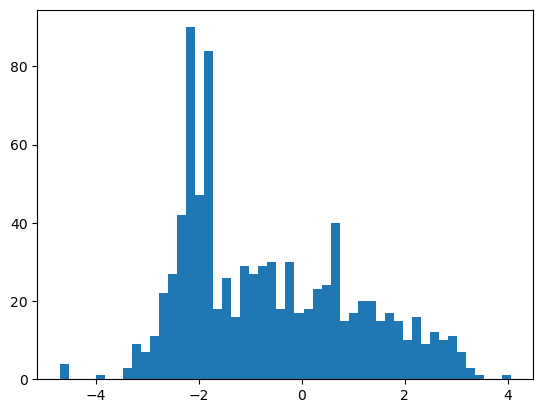

In [81]:
log_odds_titanic = np.log(odds_titanic)

plt.hist(log_odds_titanic, bins= 50)
plt.show()

### ¿Y esto que? 

Si tomamos los coeficientes de una regresión logistica como si gura una regresión lineal, obtenemos un numero extraño

$$z = \Theta ^T X $$



In [82]:
# Calcula Z
z = (model.coef_ * X).sum(axis=1) +  model.intercept_
z

0     -2.276357
1      2.243739
2      0.432538
3      1.839575
4     -2.440047
         ...   
886   -0.938888
887    2.668396
888   -0.116798
889    0.326107
890   -1.948405
Length: 891, dtype: float64

Resulta ser que z es lo mismo que log odds

In [83]:
verdad = pd.DataFrame({
    'z': z,
    'log_odds': log_odds_titanic
    })
verdad

,z,log_odds
0,-2.276357,-2.276357
1,2.243739,2.243739
2,0.432538,0.432538
3,1.839575,1.839575
4,-2.440047,-2.440047
...,...,...
886,-0.938888,-0.938888
887,2.668396,2.668396
888,-0.116798,-0.116798
889,0.326107,0.326107


In [84]:
coeficientes = pd.DataFrame({
    'features': X.keys(),
    'coeficientes': model.coef_[0]
})
coeficientes

,features,coeficientes
0,Age,-0.036838
1,SibSp,-0.312666
2,Parch,-0.074817
3,Fare,0.003171
4,Pclass_2,-0.717232
5,Pclass_3,-1.907992
6,Sex_male,-2.541440
7,Embarked_Q,-0.074937
8,Embarked_S,-0.457017


### Esto es importante porque de aquí sale sigmoide

$$log(\frac{p}{1-p}) = \Theta ^T X$$


Aplicamos la exponencial en ambos lados:

$$
e^{\Theta ^T X} = \frac{p}{1 - p}
$$

Despejamos \( p \):

$$
p = \frac{e^{\Theta ^T X}}{1 + e^{\Theta ^T X}}
$$

Simplificando

$$
p= \frac{1}{1 + e^{\Theta ^T X}}
$$

Comprobando

### _Comprobamos que Sklearn opera conforme a la teoría_ 

### Comparando diferentes tipos de regresiones

#### Regresion logistica


In [85]:
target = 'Survived'

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model= linear_model.LogisticRegression().fit(X_train, y_train)

probabilidades_modelo1 = model.predict_proba(X_test)[:, 1]

#### Checando los coeficientes

In [87]:
## Checa los coeficientes, que significan?


  #### Regresion logistica polinomial 2


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("model", linear_model.LogisticRegression(penalty = 'l2'))
])

pipeline.fit(X_train, y_train)

probabilidades_modelo2 = pipeline.predict_proba(X_test)[:, 1]


#### Polinomio grado 3

In [89]:
pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=3)),
    ("model", linear_model.LogisticRegression(penalty = 'l2'))
])

pipeline.fit(X_train, y_train)

probabilidades_modelo3 = pipeline.predict_proba(X_test)[:, 1]

#### Analisis del discriminante lineal 

In [90]:
from sklearn import discriminant_analysis

pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("model", discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)

probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

### Junta los datasets

In [91]:
juntar = pd.DataFrame({
    'real': y_test,
    'logistica1': probabilidades_modelo1,
    'logistica2': probabilidades_modelo2,
    'logistica3' : probabilidades_modelo3,
    'probabilidades_disc' : probabilidades_modelo_disc
})
juntar.head()

,real,logistica1,logistica2,logistica3,probabilidades_disc
495,0,0.154918,0.186737,2.131811e-01,0.094228
648,0,0.104608,0.124614,1.369802e-01,0.056745
278,0,0.076535,0.011373,2.245662e-07,0.066734
31,1,0.933821,0.993344,9.999965e-01,0.971403
255,1,0.691444,0.647217,9.840554e-01,0.741915


In [92]:
# Bins
bins = 5
juntar['bins_log1'] = pd.qcut(juntar['logistica1'], q=bins, labels=False) + 1
juntar['bins_log2'] = pd.qcut(juntar['logistica2'], q=bins, labels=False) + 1
juntar['bins_log3'] = pd.qcut(juntar['logistica3'], q=bins, labels=False) + 1
juntar['bins_disc'] = pd.qcut(juntar['probabilidades_disc'], q=bins, labels=False) + 1
# Agrupaciones
grouped_log1= juntar.groupby('bins_log1').mean()
grouped_log2= juntar.groupby('bins_log2').mean()
grouped_log3= juntar.groupby('bins_log3').mean()
grouped_disc= juntar.groupby('bins_disc').mean()

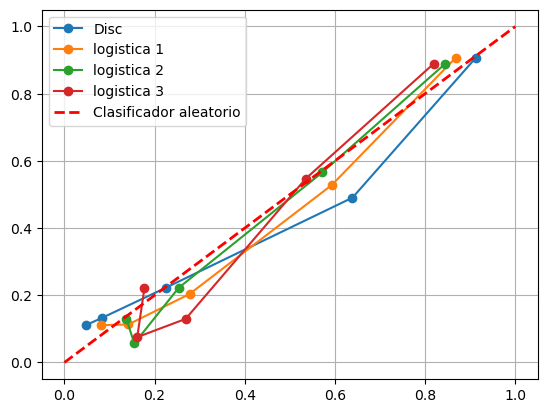

In [93]:
## Grafico de modelos
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker="o", label="Disc")
plt.plot(grouped_log1.logistica1, grouped_log1.real, marker="o", label="logistica 1")
plt.plot(grouped_log2.logistica1, grouped_log2.real, marker="o", label="logistica 2")
plt.plot(grouped_log3.logistica1, grouped_log3.real, marker="o", label="logistica 3")

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()
plt.grid()


¿Cuál es mejor? Veamos la función de perdida en el conjunto de prueba

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

In [94]:
from sklearn.metrics import log_loss

Modelo logistico

In [95]:
log_loss(y_pred=juntar.logistica1, y_true=juntar.real)

0.44386010907299145

Modelo polinomio 2

In [96]:
log_loss(y_pred=juntar.logistica2, y_true=juntar.real)

0.4350031665668785

Modelo polinomio 3

In [97]:
log_loss(y_pred=juntar.logistica3, y_true=juntar.real)

0.6811972324372253

Modelo discriminante

In [98]:
log_loss(y_pred=juntar.probabilidades_disc, y_true=juntar.real)

0.4469248818517998

#### Histogramas

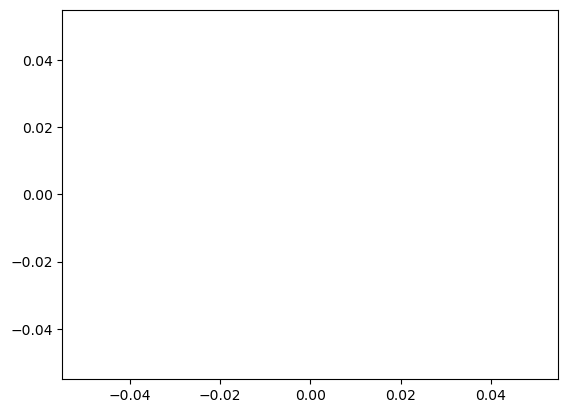

In [99]:
plt.hist(juntar.query('real == 1').logistica1, density=True, alpha=0.5)
plt.hist(juntar.query('real == 0').logistica1, density=True, alpha=0.5)
plt.show()

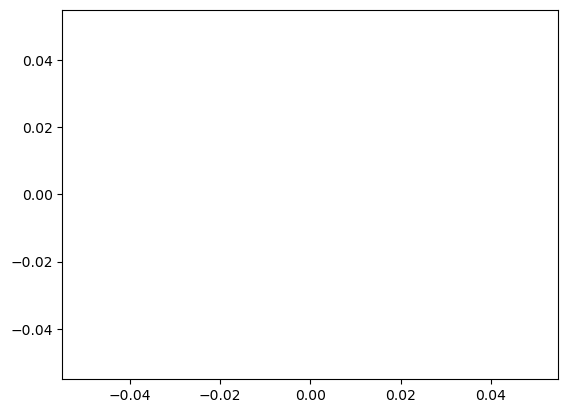

In [101]:
plt.hist(juntar.query('real == 1').logistica2, density=True, alpha=0.5)
plt.hist(juntar.query('real == 0').logistica2, density=True, alpha=0.5)
plt.show()

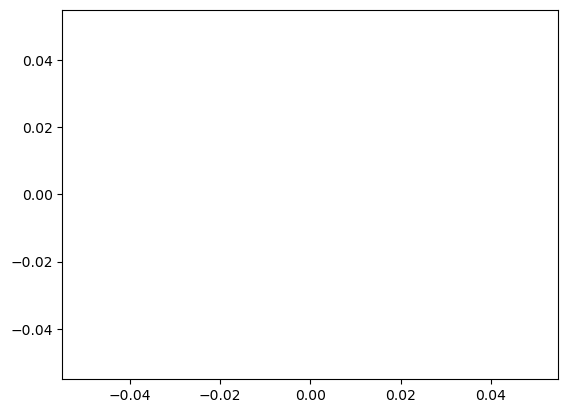

In [102]:
plt.hist(juntar.query('real == 1').logistica3, density=True, alpha=0.5)
plt.hist(juntar.query('real == 0').logistica3, density=True, alpha=0.5)
plt.show()

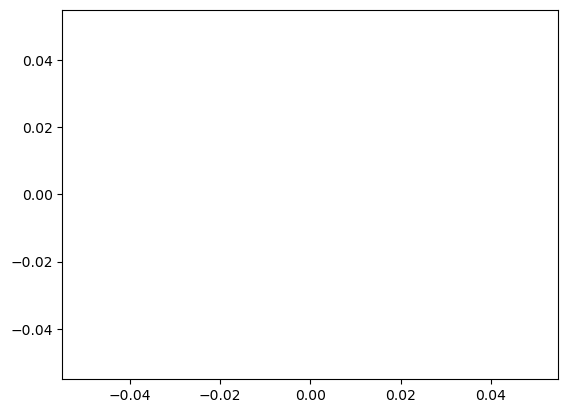

In [103]:
plt.hist(juntar.query('real == 1')['probabilidades_disc'], density=True, alpha=0.5)
plt.hist(juntar.query('real == 0')['probabilidades_disc'], density=True, alpha=0.5)
plt.show()